In [12]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "EMERGENCY"]


In [13]:
data = pd.read_excel('/content/combined_dataset.xlsx')
data.head()

,SpO2,HR,PULSE,RESP,ABP1,ABP2,ABP3,INOP_PLETH,INOP_SpO2,INOP_RESP,INOP_NOISE,ALARM,Alarm Spo2,Alarm HR,Alarm ABP2,Alarm Resp,Alarm ABP1,Alarm
0,94.0,71.0,71.0,19,69.0,113.0,50.0,0,0,0,0,0,False,False,False,False,False,False
1,94.0,71.0,71.0,19,69.0,113.0,50.0,0,0,0,0,0,False,False,False,False,False,False
2,94.0,71.0,71.0,17,70.0,113.0,51.0,0,0,0,0,0,False,False,False,False,False,False
3,94.0,71.0,71.0,17,69.0,113.0,51.0,0,0,0,0,0,False,False,False,False,False,False
4,94.0,71.0,71.0,17,69.0,113.0,50.0,0,0,0,0,0,False,False,False,False,False,False


In [14]:
columns_to_delete = [ 'INOP_PLETH','INOP_SpO2', 'INOP_RESP', 'INOP_NOISE']
data.drop(columns=columns_to_delete, inplace=True)

data.dropna( inplace = True)
data.reset_index(drop = True, inplace = True)

data.head()

,SpO2,HR,PULSE,RESP,ABP1,ABP2,ABP3,ALARM,Alarm Spo2,Alarm HR,Alarm ABP2,Alarm Resp,Alarm ABP1,Alarm
0,94.0,71.0,71.0,19,69.0,113.0,50.0,0,False,False,False,False,False,False
1,94.0,71.0,71.0,19,69.0,113.0,50.0,0,False,False,False,False,False,False
2,94.0,71.0,71.0,17,70.0,113.0,51.0,0,False,False,False,False,False,False
3,94.0,71.0,71.0,17,69.0,113.0,51.0,0,False,False,False,False,False,False
4,94.0,71.0,71.0,17,69.0,113.0,50.0,0,False,False,False,False,False,False


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83702 entries, 0 to 83701
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SpO2        83702 non-null  float64
 1   HR          83702 non-null  float64
 2   PULSE       83702 non-null  float64
 3   RESP        83702 non-null  int64  
 4   ABP1        83702 non-null  float64
 5   ABP2        83702 non-null  float64
 6   ABP3        83702 non-null  float64
 7   ALARM       83702 non-null  object 
 8   Alarm Spo2  83702 non-null  bool   
 9   Alarm HR    83702 non-null  bool   
 10  Alarm ABP2  83702 non-null  bool   
 11  Alarm Resp  83702 non-null  bool   
 12  Alarm ABP1  83702 non-null  bool   
 13  Alarm       83702 non-null  bool   
dtypes: bool(6), float64(6), int64(1), object(1)
memory usage: 5.6+ MB


In [16]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

columns_to_check = data.columns[data.columns != "ALARM"]
data = data.loc[(data[columns_to_check] != 0).all(axis=1)]
#data = data.loc[(data != 0).all(axis=1)]

In [17]:
data.shape

(0, 14)

## Exploratory Data Analysis

In [18]:
data.isnull().values.any()

False

In [19]:
data.loc[data['Alarm'] != 0, 'Alarm'] = 1
print(data['Alarm'].unique())

[]


In [20]:
data['Alarm'] = data['Alarm'].astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SpO2        0 non-null      float64
 1   HR          0 non-null      float64
 2   PULSE       0 non-null      float64
 3   RESP        0 non-null      int64  
 4   ABP1        0 non-null      float64
 5   ABP2        0 non-null      float64
 6   ABP3        0 non-null      float64
 7   ALARM       0 non-null      object 
 8   Alarm Spo2  0 non-null      bool   
 9   Alarm HR    0 non-null      bool   
 10  Alarm ABP2  0 non-null      bool   
 11  Alarm Resp  0 non-null      bool   
 12  Alarm ABP1  0 non-null      bool   
 13  Alarm       0 non-null      float64
dtypes: bool(5), float64(7), int64(1), object(1)
memory usage: 0.0+ bytes


IndexError: index 0 is out of bounds for axis 0 with size 0

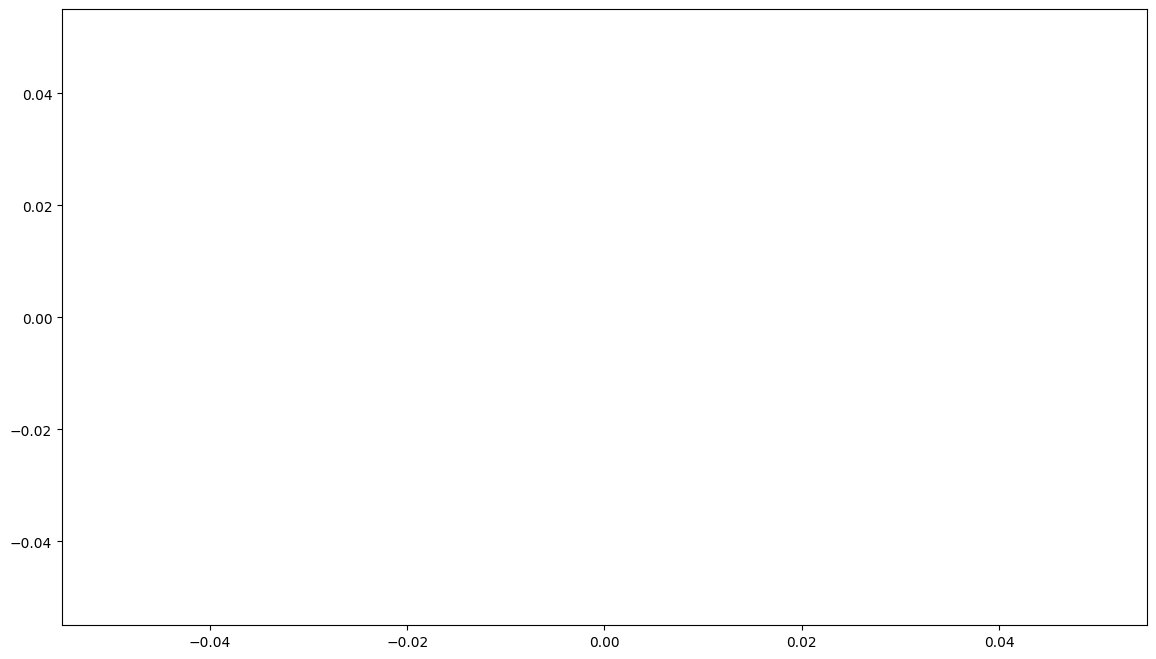

In [22]:
count_classes = pd.value_counts(data['Alarm'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset

emergency = data[data['Alarm']==1]

normal = data[data['Alarm']==0]

In [ ]:
print(emergency.shape,normal.shape)

In [ ]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

In [ ]:
data.shape

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Emergency = data1[data1['Alarm']==1]

Valid = data1[data1['Alarm']==0]

outlier_fraction = len(Emergency)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Emergency Cases : {}".format(len(Emergency)))

print("Valid Cases : {}".format(len(Valid)))

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Alarm"]]
# Store the variable we are predicting
target = "Alarm"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)


In [ ]:
print(X_outliers)

In [ ]:
smote = SMOTE(random_state=RANDOM_SEED)
X_resampled, y_resampled = smote.fit_resample(X, Y)

print(X_resampled.shape)
print( np.sum(y_resampled == 1))

## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1, )

}

In [ ]:
type(classifiers)

In [ ]:
n_outliers = len(Emergency)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

#### Observations :
- Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
- Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [ ]:
corr_matrix = data1.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()